In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the grayscale MRI image
mri_image = cv2.imread('mri15.png', cv2.IMREAD_GRAYSCALE)

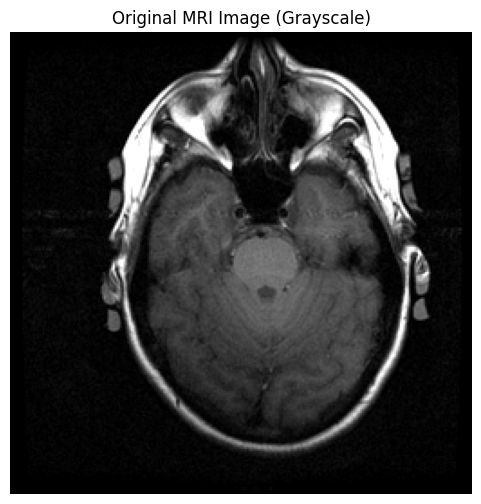

In [3]:
# Show the original MRI image
plt.figure(figsize=(6, 6))
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image (Grayscale)')
plt.axis('off')
plt.show()

In [4]:
# Convert the grayscale image to binary using a threshold
# Any pixel value greater than 127 is set to 255 (white), others are set to 0 (black)
_, binary_mri_image = cv2.threshold(mri_image, 127, 255, cv2.THRESH_BINARY)


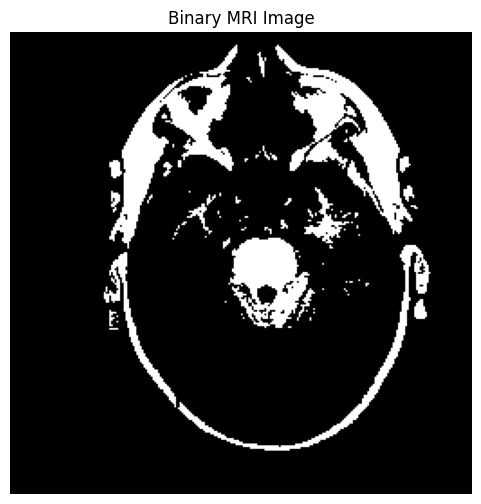

In [5]:
# Show the binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary_mri_image, cmap='gray')
plt.title('Binary MRI Image')
plt.axis('off')
plt.show()

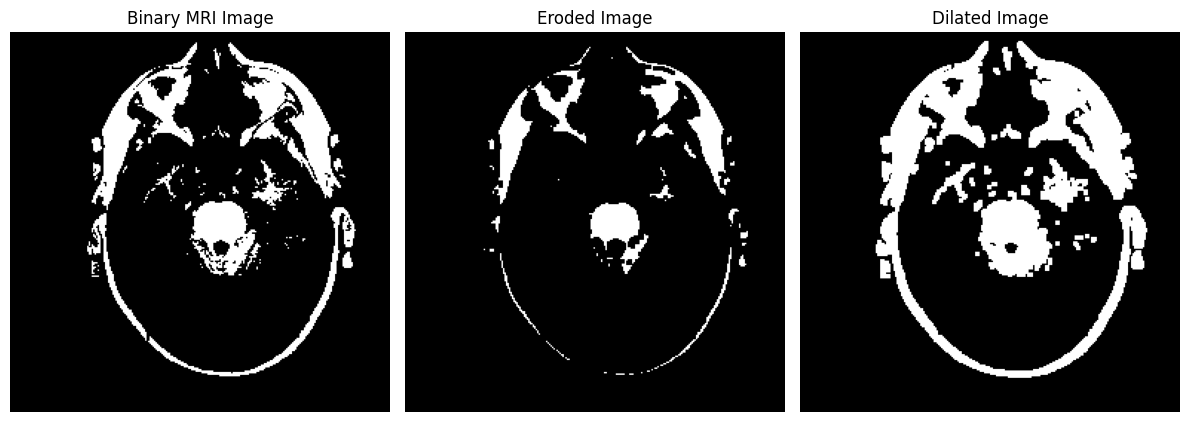

In [6]:
# Define a structuring element for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Apply erosion
eroded_image = cv2.erode(binary_mri_image, kernel, iterations=1)

# Apply dilation
dilated_image = cv2.dilate(binary_mri_image, kernel, iterations=1)

# Show the results
plt.figure(figsize=(12, 6))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_mri_image, cmap='gray')
plt.title("Binary MRI Image")
plt.axis('off')

# Eroded image
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')

# Dilated image
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated Image")
plt.axis('off')

plt.tight_layout()
plt.show()


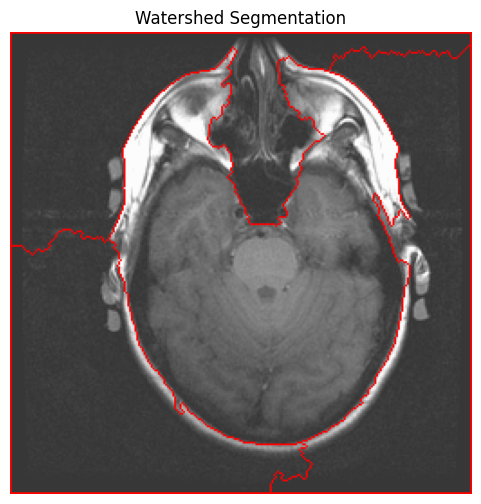

In [7]:
# Apply Watershed on the binary image

# Invert the binary image to make the background 255 (required for watershed)
binary_mri_inv = cv2.bitwise_not(binary_mri_image)

# Find sure background by dilating the inverted binary image
sure_bg = cv2.dilate(binary_mri_inv, kernel, iterations=3)

# Apply distance transform to find the sure foreground
dist_transform = cv2.distanceTransform(binary_mri_inv, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert to uint8
sure_fg = np.uint8(sure_fg)

# Subtract the sure foreground from the sure background to get the unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Label the markers (connected components)
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that the background is not labeled as 0
markers = markers + 1

# Mark the unknown regions with 0
markers[unknown == 255] = 0

# Apply the watershed algorithm
mri_image_colored = cv2.cvtColor(mri_image, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(mri_image_colored, markers)
mri_image_colored[markers == -1] = [255, 0, 0]  # Boundary pixels in red

# Show the result
plt.figure(figsize=(6, 6))
plt.imshow(mri_image_colored)
plt.title("Watershed Segmentation")
plt.axis('off')
plt.show()


RESTORE ORIGINAL IMAGE? (use Computer Vision techniques)

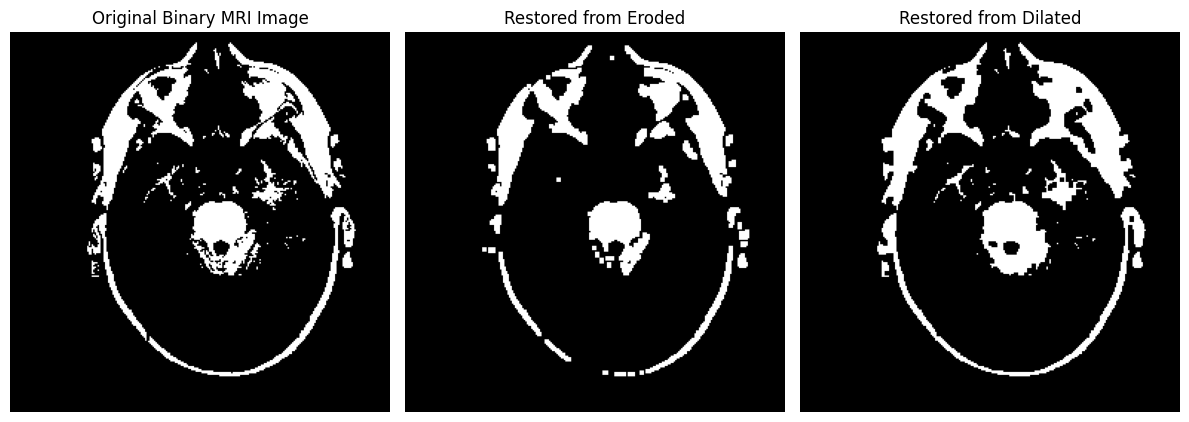

In [8]:
# Attempt to restore eroded image by applying dilation
restored_from_eroded = cv2.dilate(eroded_image, kernel, iterations=1)

# Attempt to restore dilated image by applying erosion
restored_from_dilated = cv2.erode(dilated_image, kernel, iterations=1)

# Show the images
plt.figure(figsize=(12, 6))

# Original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary_mri_image, cmap='gray')
plt.title("Original Binary MRI Image")
plt.axis('off')

# Restored from eroded image
plt.subplot(1, 3, 2)
plt.imshow(restored_from_eroded, cmap='gray')
plt.title("Restored from Eroded")
plt.axis('off')

# Restored from dilated image
plt.subplot(1, 3, 3)
plt.imshow(restored_from_dilated, cmap='gray')
plt.title("Restored from Dilated")
plt.axis('off')

plt.tight_layout()
plt.show()


Image inpainting

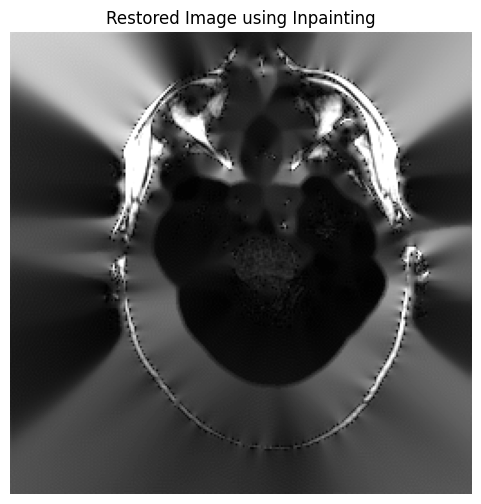

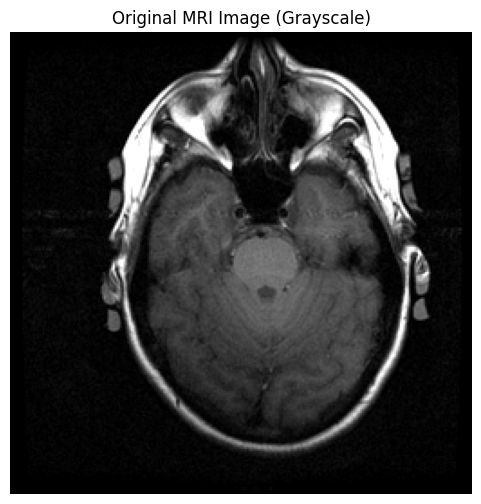

In [11]:
# Let's assume the binary image has lost some data (e.g., areas where the pixel values are 0)
# We will use inpainting to try to restore these areas.

# Create a mask of the damaged areas (areas with pixel value 0)
mask = cv2.bitwise_not(binary_mri_image)

# Apply inpainting
restored_image = cv2.inpaint(mri_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Show the inpainted (restored) image
plt.figure(figsize=(6, 6))
plt.imshow(restored_image, cmap='gray')
plt.title("Restored Image using Inpainting")
plt.axis('off')
plt.show()

# Show the original MRI image
plt.figure(figsize=(6, 6))
plt.imshow(mri_image, cmap='gray')
plt.title('Original MRI Image (Grayscale)')
plt.axis('off')
plt.show()


In [21]:
print(binary_mri_image)  # Should be a NumPy array, not None
print(original_image)  # Should be a NumPy array, not None

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[55 55 55 ... 55 55 55]
 [55 55 55 ... 55 55 55]
 [55 55 55 ... 55 55 55]
 ...
 [55 55 55 ... 55 55 55]
 [55 55 55 ... 55 55 55]
 [55 55 55 ... 55 55 55]]


Bilateral Filtering for Edge-Preserving Smoothing

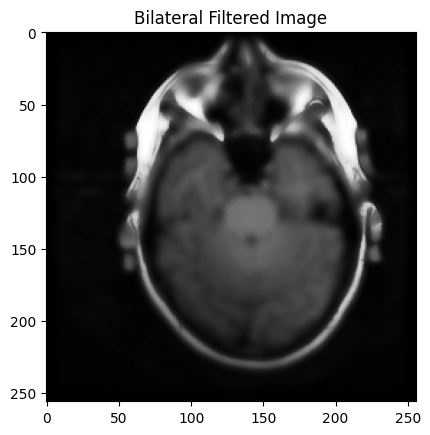

In [37]:
# Load the grayscale MRI image
mri_image = cv2.imread('mri15.png', cv2.IMREAD_GRAYSCALE)

# Apply bilateral filter to preserve edges while reducing noise
bilateral_filtered = cv2.bilateralFilter(mri_image, 9, 75, 75)

# Display the filtered image
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.show()


In [39]:
pip install PyWavelets

Wavelet Transform (break down an image into different frequency components to process each band (low and high frequency) independently and then reconstruct the image)

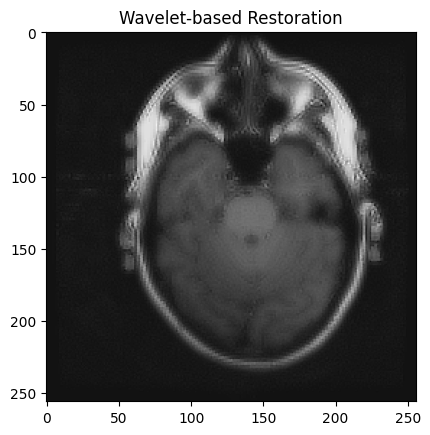

In [40]:
import pywt

# Perform a 2D wavelet transform
coeffs2 = pywt.dwt2(mri_image, 'haar')
LL, (LH, HL, HH) = coeffs2

# You can manipulate the coefficients to enhance or suppress features
# Here, for example, we suppress the high frequencies to smooth the image
LL = cv2.GaussianBlur(LL, (5, 5), 0)

# Reconstruct the image after processing
restored_image = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

# Display the restored image
plt.imshow(restored_image, cmap='gray')
plt.title('Wavelet-based Restoration')
plt.show()


Anomalies (tumors benign / malignant)

With Opening (erosion followed by dilation) & Closing (dilation followed by erosion)

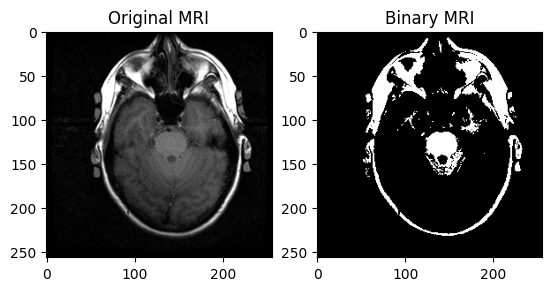

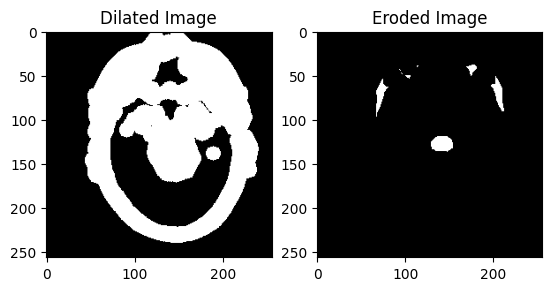

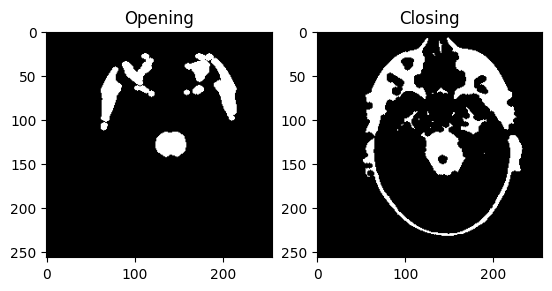

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale MRI image
mri_image = cv2.imread('mri15.png', cv2.IMREAD_GRAYSCALE)

# Convert the grayscale image to binary using adaptive thresholding
_, binary_image = cv2.threshold(mri_image, 128, 255, cv2.THRESH_BINARY)

# Display the original and binary images
plt.subplot(121), plt.imshow(mri_image, cmap='gray'), plt.title('Original MRI')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Binary MRI')
plt.show()

# Create custom structuring elements (circle, ellipse, vertical rectangle)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
circle_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# Perform dilation with the circular kernel
dilated_image = cv2.dilate(binary_image, circle_kernel, iterations=2)

# Perform erosion with the rectangular kernel
eroded_image = cv2.erode(binary_image, rect_kernel, iterations=2)

# Display the processed images
plt.subplot(121), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated Image')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded Image')
plt.show()

# Combination of Erosion and Dilation (Opening and Closing)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, ellipse_kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, ellipse_kernel)

# Display the results
plt.subplot(121), plt.imshow(opening, cmap='gray'), plt.title('Opening')
plt.subplot(122), plt.imshow(closing, cmap='gray'), plt.title('Closing')
plt.show()
